# Trabajo Práctico N°3
__UNLZ - Facultad de Ingeniería__       
__Electrotecnia__      
__Alumno:__ Daniel Antonio Lorenzo

## Ejercicio N°1
Calcular las potencias activa (P), reactiva (Q) y aparente (S) del siguiente circuito y dibujar el fasorial de potencias.

<img src="img/tp4ep1.png">

### Solución

__Datos:__
$\left\{
\begin{array}{l}
Z_1 = 10 + j10 \, \Omega \\
Z_2 = 0 + j10 \, \Omega \\
Z_3 = 100 + j0 \, \Omega \\
U_\mathrm{rms} = 220 \, \mathrm{V}
\end{array}
\right.$

Cálculo de $Z_{eq} = (Z_2 + Z_3) \,  || \, Z_1$

$$ Z_{eq} = {Z_1 \cdot (Z_2 + Z_3) \over Z_1 + Z_2 + Z_3 } = 12,71 \angle 40,41^\circ \, \Omega = 9,68 + j8,24 \, \Omega $$

Cálculo de $I_\mathrm{rms}$

$$ I_\mathrm{rms} = {U_\mathrm{rms} \over Z_{eq} } = 17,31 \angle -40,41^\circ \, \mathrm{A} $$

Cálculo de $S$
$$ S = U_\mathrm{rms} I_\mathrm{rms}^* = 3807,37 \angle 40,41^\circ \, \mathrm{VA} $$

$$ S = 2899,21 + j2467,92 \, \mathrm{VA} $$

Entonces
$$ P = 2899,21 \, \mathrm{W} $$

$$ Q = 2467,92 \, \mathrm{VAr} $$

In [1]:
import math, cmath

In [2]:
# Datos:
Z1 = 10 + 10j # Ohm
Z2 = 0 + 10j # Ohm
Z3 = 100 + 0j # Ohm
Urms = 220 # V

In [3]:
# Defino una función que calcula elementos en paralelo
def prl(x,y):
    return (x*y)/(x + y)

In [4]:
# (Z2 + Z3) || Z1
Zeq = prl(Z2 + Z3, Z1)
Irms = Urms/Zeq

In [5]:
# Potencia aparente (S):
S = Urms*( Irms.conjugate() )
phi = cmath.phase(S)
# Potencia activa (P):
P = S.real
# Potencia reactiva (Q):
Q = S.imag

In [6]:
print('Resultados:')
print('---------------------------------------')
print('Zeq = (%.2f < %.2f°) Ohm'%(abs(Zeq) , math.degrees( cmath.phase(Zeq) ) ) )
print('Zeq = {:.2f} Ohm'.format(Zeq))
print('Irms = (%.2f < %.2f°) A'%(abs(Irms) , math.degrees( cmath.phase(Irms) ) ))
print('---------------------------------------')
print('S = (%.2f < %.2f°) VA'%(abs(S) , math.degrees( phi ) ))
print('S = {:.2f} VA'.format(S))
print('P = %.2f W'%P)
print('Q = %.2f VAr'%abs(Q) ) 
print('---------------------------------------')

Resultados:
---------------------------------------
Zeq = (12.71 < 40.41°) Ohm
Zeq = 9.68+8.24j Ohm
Irms = (17.31 < -40.41°) A
---------------------------------------
S = (3807.37 < 40.41°) VA
S = 2899.21+2467.92j VA
P = 2899.21 W
Q = 2467.92 VAr
---------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


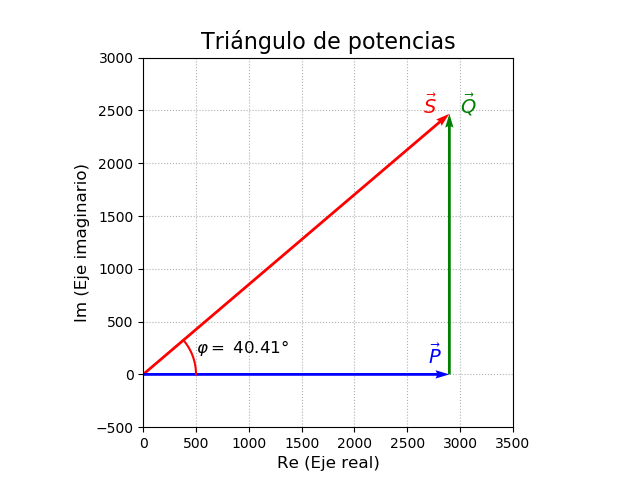

In [8]:
%matplotlib notebook
plt.figure()
ax = plt.gca()
ax.quiver(0,0,P,Q,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,P,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(P,0,0,Q,angles='xy',scale_units='xy',scale=1,color='green')   
plt.text(P - 250, Q, r'$\vec S$', fontsize=14, color='red', fontweight='bold')
plt.text(P - 200,  100, r'$\vec P$', fontsize=14, color='blue', fontweight='bold')
plt.text(P + 100, Q, r'$\vec Q$', fontsize=14, color='green', fontweight='bold')
plt.text(500,  200, r'$\varphi =$ %.2f°'%( math.degrees(phi) ), fontsize=12)
theta = np.linspace(0, phi, 100) 
x1 = 500 * np.cos(theta)
x2 = 500 * np.sin(theta)
plt.plot(x1, x2, color='red')
ax.set_xlim([0,3500])
ax.set_ylim([-500,3000])
ax.set_aspect('equal')
plt.title('Triángulo de potencias', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=12)
plt.ylabel('Im (Eje imaginario)',  fontsize=12)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [9]:
%reset -s -f

## Ejercicio N°2
Calcular el valor de la capacidad para que $\cos \varphi = 0,9$

<img src="img/tp4ep2.png">

### Solución

__Datos:__
$\left\{
\begin{array}{l}
Z_1 = 10 + j5 \, \Omega \\
Z_2 = 10 + j100 \, \Omega \\
U = 100 \, \mathrm{V \; (rms)} \\
\mathrm{fp} = 0,9 \\
f = 50 \, \mathrm{Hz}
\end{array}
\right.
$

Cálculo de $Z_{eq1} = Z_1 || Z_2$
$$ Z_{eq1} = { Z_1 \times Z_2 \over Z_1 + Z_2 } = 10,51 < 31.64^\circ \, \Omega = 8,95 + j5,51 \, \Omega $$

Cálculo de $I_1$
$$ I_1 = {U \over Z_{eq1}} = 9,51 \angle -31,54^\circ \, \mathrm{A} $$

Cálculo de $S_1$
$$ S_1 = U \times I_1^* = 951,29 \angle 31,64^\circ \, \mathrm{VA}$$

$$ S_1 = 809,90 + j499,01 \, \mathrm{VA} $$

Entonces:
$$ P_1 = 809,90 \, \mathrm{W} $$

$$ Q_1 = 499,01 \, \mathrm{VAr} $$

$$\begin{array}{c}
P_1 = P_2 \\
|U| |I_1| \cos \varphi_1 = |U| |I_2| \cos \varphi_2 \\
|I_1| \cos \varphi_1 = |I_2| \cos \varphi_2
\end{array}$$

Entonces
$$\begin{array}{l}
 | I_2 | &= \displaystyle | I_1 | {\cos \varphi_1 \over \cos \varphi_2} \\
 | I_2 | &= \displaystyle | I_1 | {\cos \varphi_1 \over \mathrm{fp} } \\
 |I_2| &= 9,00 \, \mathrm{A}
\end{array}$$

Cálculo de $\varphi_2$
$$ \mathrm{fp} = \cos \varphi_2 = 0,9 $$

$$ \varphi_2 =  \arccos 0,9 = 25,84^\circ $$

Cálculo de $S_2$
$$ S_2 = U  I_2 \cos (\varphi_2) = 899,89 \angle 25,84^\circ \, \mathrm{VA} $$

$$ S_2 = 809,90 + j392,25 \, \mathrm{VA} $$

Luego
$$ Q_2 = 392,25 \, \mathrm{VAr} $$

__Cálculo de $Q_C$__
$$ Q_C = Q_1 - Q_2 = 106,76 \, \mathrm{VAr} $$

$$ Q_C = \frac{U^2}{X_C} = \frac{U^2}{ 1 \over \omega C } $$

__Entonces__
$$ C = \frac{Q_C}{2 \pi f U^2} = 33,98 \, \mu \mathrm{F} $$

In [10]:
import math, cmath

In [11]:
# Datos:
Z1 = 10 + 5j # Ohm
Z2 = 10 + 100j # Ohm
U = 100 # V
fp = 0.9
f = 50 # Hz

In [12]:
def prl(x,y):
    return (x*y)/(x + y)

In [13]:
#Cálculo de Zeq
Zeq1 = prl(Z1,Z2)
# Cálculo de I1
I1 = U/Zeq1
S1 = U*I1.conjugate()
P1 = S1.real
Q1 = S1.imag
P2 = P1
phi1 = cmath.phase(S1)
# P1 = P2  --> U*I1*cos(phi1) = U*I2*cos(phi2)
# y tenemos que fp = cos(phi2)
# Cálculo de phi2
phi2 = math.acos(fp)
I2 = cmath.rect( abs(I1)*math.cos(phi1)/fp , -phi2)
S2 = U*I2.conjugate()
Q2 = S2.imag
# Cálculo de Qc
Qc = Q1 - Q2
# Cálculo de C
C = Qc/(2*math.pi*f*U**2)

In [14]:
print('Resultados:')
print('---------------------------------------')
print('Zeq1 = (%.2f < %.2f°) Ohm'%(abs(Zeq1) , math.degrees( cmath.phase(Zeq1) ) ))
print('Zeq1 = {:.2f} Ohm'.format(Zeq1))
print('I1 = (%.2f < %.2f°) A'%(abs(I1), math.degrees( cmath.phase(I1) )))
print('I2 = (%.2f < %.2f) A'%(abs(I2) , math.degrees( cmath.phase(I2) ) ))
print('---------------------------------------')
print('S1 = (%.2f < %.2f°) VA'%(abs(S1) , math.degrees( cmath.phase(S1) ) ))
print('S1 = {:.2f} VA'.format(S1))
print('P1 = %.2f W'%P1)
print('Q1 = %.2f VAr'%Q1)
print('---------------------------------------')
print('S2 = (%.2f < %.2f°) VA'%(abs(S2), math.degrees( cmath.phase(S2) ) ))
print('S2 = {:.2f} VA'.format(S2) )
print('P2 = %.2f W'%P2)
print('Q2 = %.2f VAr'%(abs(Q2)))
print('---------------------------------------')
print('Qc = %.2f VAr'%Qc)
print('C = %.2f uF'%(C*1e6) )
print('---------------------------------------')

Resultados:
---------------------------------------
Zeq1 = (10.51 < 31.64°) Ohm
Zeq1 = 8.95+5.51j Ohm
I1 = (9.51 < -31.64°) A
I2 = (9.00 < -25.84) A
---------------------------------------
S1 = (951.29 < 31.64°) VA
S1 = 809.90+499.01j VA
P1 = 809.90 W
Q1 = 499.01 VAr
---------------------------------------
S2 = (899.89 < 25.84°) VA
S2 = 809.90+392.25j VA
P2 = 809.90 W
Q2 = 392.25 VAr
---------------------------------------
Qc = 106.76 VAr
C = 33.98 uF
---------------------------------------


In [15]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


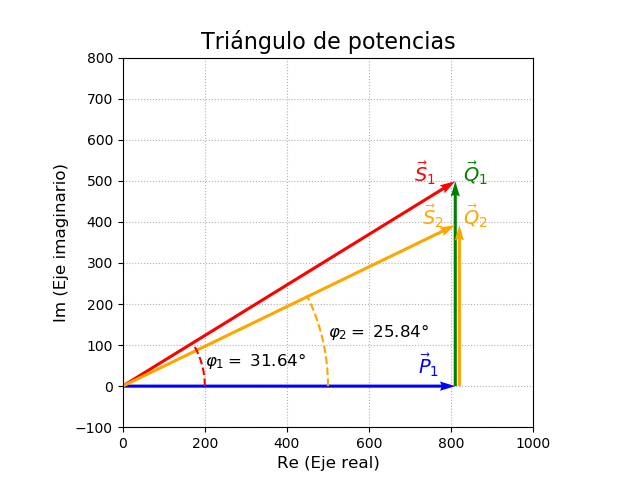

In [16]:
%matplotlib notebook
plt.figure()
ax = plt.gca()
ax.quiver(0,0,P1,Q1,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,P1,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(P1,0,0,Q1,angles='xy',scale_units='xy',scale=1,color='green')   
ax.quiver(P2 + 10,0,0,Q2,angles='xy',scale_units='xy',scale=1,color='orange')   
ax.quiver(0,0,P2,Q2,angles='xy',scale_units='xy',scale=1,color='orange')
plt.text(P1 - 100, Q1, r'$\vec S_1$', fontsize=14, color='red', fontweight='bold')
plt.text(P1 - 90,  30, r'$\vec P_1$', fontsize=14, color='blue', fontweight='bold')
plt.text(P1 + 20, Q1, r'$\vec Q_1$', fontsize=14, color='green', fontweight='bold')
plt.text(P2 - 80, Q2, r'$\vec S_2$', fontsize=14, color='orange', fontweight='bold')
plt.text(P2 + 20, Q2, r'$\vec Q_2$', fontsize=14, color='orange', fontweight='bold')
plt.text(200, 50, r'$\varphi_1 =$ %.2f°'%( math.degrees(phi1) ), fontsize=12)
plt.text(500, 120, r'$\varphi_2 =$ %.2f°'%( math.degrees(phi2) ), fontsize=12)
theta1 = np.linspace(0, phi1, 100) 
x1 = 200 * np.cos(theta1)
x2 = 200 * np.sin(theta1)
plt.plot(x1, x2, color='red', linestyle="--")
theta2 = np.linspace(0, phi2, 100) 
x3 = 500 * np.cos(theta2)
x4 = 500 * np.sin(theta2)
plt.plot(x3, x4, color='orange', linestyle="--")
ax.set_xlim([0,1000])
ax.set_ylim([-100,800])
ax.set_aspect('equal')
plt.title('Triángulo de potencias', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=12)
plt.ylabel('Im (Eje imaginario)',  fontsize=12)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [17]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = 'styles/aeropython.css'
HTML(open(css_file, "r").read())